In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
%matplotlib inline
df = pd.read_csv('movie_metadata.csv')


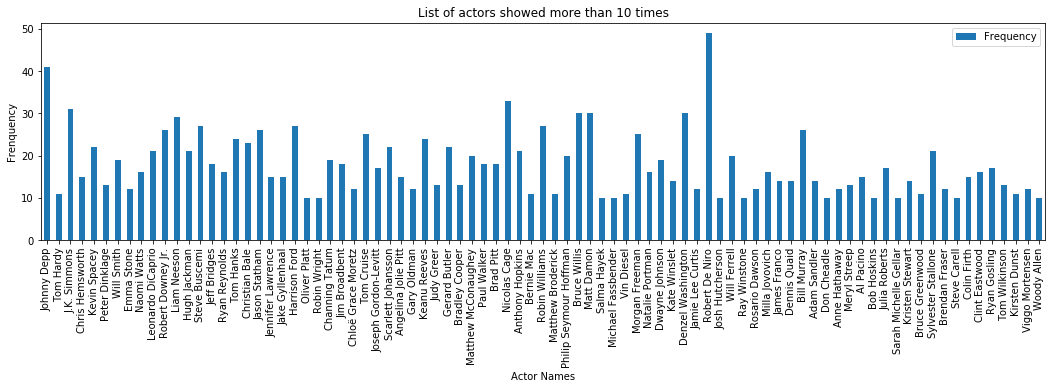

In [105]:

actor_1_counts = Counter(df['actor_1_name'])
result = pd.DataFrame.from_dict(actor_1_counts, orient='index')
popular = {}
min_occus_act = 10
for key, value in actor_1_counts.items():
    if value >=min_occus_act:
        popular[key] = value
rank = Counter(popular)
rank_result = pd.DataFrame.from_dict(rank, orient='index')
rank_result.plot(kind='bar',figsize=(18, 4))
plt.xlabel('Actor Names')
plt.ylabel('Frenquency')
plt.title('List of actors showed more than ' + str(min_occus_act) + ' times')
plt.legend(['Frequency'])
plt.show()



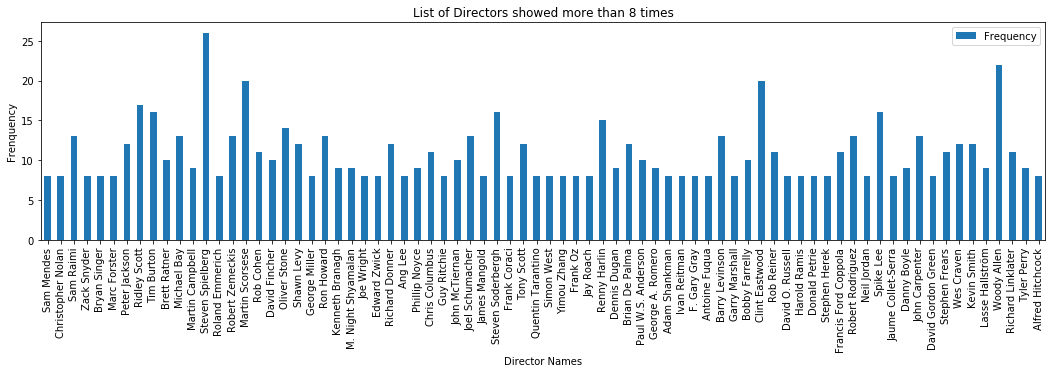

In [106]:
director_counts = Counter(df['director_name'].dropna())
result = pd.DataFrame.from_dict(director_counts, orient='index')
popular = {}
min_occus_dir = 8
for key, value in director_counts.items():
    if value >=min_occus_dir:
        popular[key] = value
rank = Counter(popular)
rank_result = pd.DataFrame.from_dict(rank, orient='index')
rank_result.plot(kind='bar',figsize=(18, 4))
plt.xlabel('Director Names')
plt.ylabel('Frenquency')
plt.title('List of Directors showed more than '+ str(min_occus_dir) + ' times')
plt.legend(['Frequency'])
plt.show()

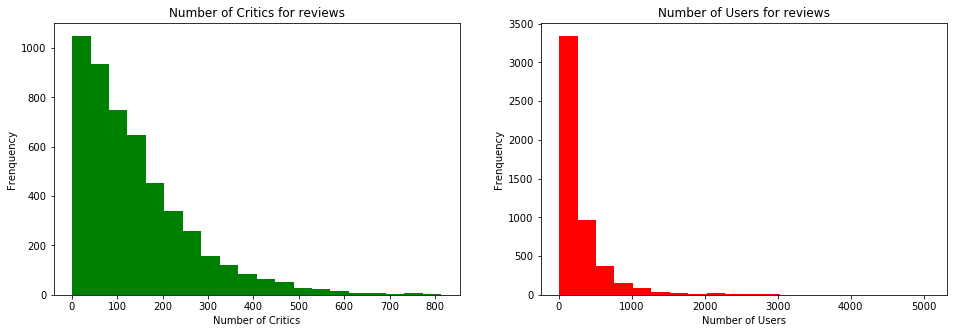

In [90]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.hist(df['num_critic_for_reviews'].dropna(), bins=20, color='green')
plt.xlabel('Number of Critics')
plt.ylabel('Frenquency')
plt.title('Number of Critics for reviews')

plt.subplot(1, 2, 2)
plt.hist(df['num_user_for_reviews'].dropna(), bins=20, color='red')
plt.xlabel('Number of Users')
plt.ylabel('Frenquency')
plt.title('Number of Users for reviews')
plt.show()